# 09.02
* 추가적인 FE 과정 거친 후의 LGBM : **46.3** 
  - [48.04, 43.22, 51.16, 43.06, 45.52, 40.13, 44.62, 47.12, 46.52, 37.55, 57.56, 51.00] 
  - weather 에서 발생하는 NaN 값을 해당 월의 mean 값으로 채우고 싶은데 ... 근데 이걸 하면 인덱스가 꼬여버려서 mape가 110이 나와버림.. ㅠ 
  - n_estimator 5000 으로 설정했더니 값이 확확 주는데... early stopping 못만남.. 도대체 얼마나 돌려야 하는거 ?  
* n_estimator 10000 LGBM : **46.5237**
  - [51.86, 44.32, 47.73, 42.77, 44.40, 41.10, 43.37, 49.53, 45.49, 36.78, 60.25, 50.63]
  - 5000일 때랑 체감 비슷한 느낌 ...젤 작은 mape값은 36 까지도 나옴! 
* xgboost : **54.77**
  - [52.39, 47.13, 50.77, 56.34, 47.51, 44.86, 53.32, 70.16, 57.48, 60.68, 55.21, 61.31]
  - lgbm 보다 확실히 성능이 별로 ㅜㅜ 

In [2]:
import os
import sys
import joblib

import pandas as pd 
import numpy as np
pd.options.display.max_rows = 100
pd.options.display.max_columns = 500
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import imp
import datetime
from tqdm import tqdm

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# Data Load

In [206]:
data = joblib.load(os.path.join('..', '..', '0.Data', '01_제공데이터', 'Snd_FE_ver2.pkl'))
locals().update(data)

In [207]:
data["X"].head()

,노출(분),판매단가,방송시간차,상품방송횟수,브랜드방송횟수,조기매진,isHoliday,방송월,방송일,방송시간(분),평일여부,상품군_최고판매단가,상품군_최저판매단가,상품군_평균판매단가,상품군_중간판매단가,상품군_최고-최저,상품군_표준편차,상품군_분산,마더코드_최고판매단가,마더코드_최저판매단가,마더코드_평균판매단가,마더코드_최고-최저,마더코드_분산,마더코드_표준편차,상품군&브랜드_최고판매단가,상품군&브랜드_최저판매단가,상품군&브랜드_평균판매단가,상품군&브랜드_중간판매단가,상품군&브랜드_최고-최저,상품군&브랜드_표준편차,상품군&브랜드_분산,NEW_최고판매단가,NEW_최저판매단가,NEW_평균판매단가,NEW_중간판매단가,NEW_최고-최저,NEW_분산,NEW_표준편차,상품군평균판매단가차이,결합상품,log최근3개월상품군추세,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,경상지수,불변지수,현재생활형편CSI,현재경기판단CSI,생활형편전망CSI,소비지출전망CSI,주택가격전망CSI,임금수준전망CSI,소비자심리지수,합계,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,스포츠·레저용품,화장품,아동·유아용품,음·식료품,농축수산물,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타,Busan,Chungbuk,Chungnam,Daegu,Daejeon,Gangwon,Gwangju,Gyeongbuk,Gyeonggi,Gyeongnam,Incheon,Jeju,Jeonbuk,Jeonnam,Seoul,Total_x,Ulsan,Unclassified,Accommodation,Accommodation/Food Services,Airlines,Books/Stationery,Clothing/Miscellaneous Goods,Convenience Stores,Cosmetics,Department Stores,Discount Stores/Other Superstores,Domestic Motor Vehicles (New Products),Duty-free Shops,Education,Electronic Commerce,Fashion Accessories,Financial Services/Insurance,Food Products,Fuels,Furniture,Furniture/Electrical Appliances,Garments/Clothing Materials,General Food Products,General Hospitals,Health,Health Additive Foods,Household Appliances/Communication Equipment,Motor Vehicle Services,Motor Vehicles,Non-specialized Retail Stores,Other Goods and Services,Other Health Facilities,Other Vehicles,Public Transportation,Recreation/Culture,Restaurants/Other Food Services,Sports/Recreation/Leisure,Supermarkets,Total_y,Transport,Travel Agencies/Vehicle Rental,Utility Charges/Personal and Professional Services,Watches/Jewellery/Eyeglasses,강수량(mm)_경기_동두천,강수량(mm)_경기_수원,강수량(mm)_경기_양평,강수량(mm)_경기_이천,강수량(mm)_경기_파주,강수량(mm)_광주,강수량(mm)_대구,강수량(mm)_대전,강수량(mm)_부산,강수량(mm)_서울,강수량(mm)_울산,강수량(mm)_인천_강화,강수량(mm)_인천_인천,기온(°C)_경기_동두천,기온(°C)_경기_수원,기온(°C)_경기_양평,기온(°C)_경기_이천,기온(°C)_경기_파주,기온(°C)_광주,기온(°C)_대구,기온(°C)_대전,기온(°C)_부산,기온(°C)_서울,기온(°C)_울산,기온(°C)_인천_강화,기온(°C)_인천_인천,습도(%)_경기_동두천,습도(%)_경기_수원,습도(%)_경기_양평,습도(%)_경기_이천,습도(%)_경기_파주,습도(%)_광주,습도(%)_대구,습도(%)_대전,습도(%)_부산,습도(%)_서울,습도(%)_울산,습도(%)_인천_강화,습도(%)_인천_인천,시정(10m)_경기_동두천,시정(10m)_경기_수원,시정(10m)_경기_양평,시정(10m)_경기_이천,시정(10m)_경기_파주,시정(10m)_광주,시정(10m)_대구,시정(10m)_대전,시정(10m)_부산,시정(10m)_서울,시정(10m)_울산,시정(10m)_인천_강화,시정(10m)_인천_인천,이슬점온도(°C)_경기_동두천,이슬점온도(°C)_경기_수원,이슬점온도(°C)_경기_양평,이슬점온도(°C)_경기_이천,이슬점온도(°C)_경기_파주,이슬점온도(°C)_광주,이슬점온도(°C)_대구,이슬점온도(°C)_대전,이슬점온도(°C)_부산,이슬점온도(°C)_서울,이슬점온도(°C)_울산,이슬점온도(°C)_인천_강화,이슬점온도(°C)_인천_인천,일조 QC플래그_경기_동두천,일조 QC플래그_경기_수원,일조 QC플래그_경기_양평,일조 QC플래그_경기_이천,일조 QC플래그_경기_파주,일조 QC플래그_광주,일조 QC플래그_대구,일조 QC플래그_대전,일조 QC플래그_부산,일조 QC플래그_서울,일조 QC플래그_울산,일조 QC플래그_인천_강화,일조 QC플래그_인천_인천,일조(hr)_경기_동두천,일조(hr)_경기_수원,일조(hr)_경기_양평,일조(hr)_경기_이천,일조(hr)_경기_파주,일조(hr)_광주,일조(hr)_대구,일조(hr)_대전,일조(hr)_부산,일조(hr)_서울,일조(hr)_울산,일조(hr)_인천_강화,일조(hr)_인천_인천,전운량(10분위)_경기_동두천,전운량(10분위)_경기_수원,전운량(10분위)_경기_양평,전운량(10분위)_경기_이천,전운량(10분위)_경기_파주,전운량(10분위)_광주,전운량(10분위)_대구,전운량(10분위)_대전,전운량(10분위)_부산,전운량(10분위)_서울,전운량(10분위)_울산,전운량(10분위)_인천_강화,전운량(10분위)_인천_인천,중하층운량(10분위)_경기_동두천,중하층운량(10분위)_경기_수원,중하층운량(10분위)_경기_양평,중하층운량(10분위)_경기_이천,중하층운량(10분위)_경기_파주,중하층운량(10분위)_광주,중하층운량(10분위)_대구,중하층운량(10분위)_대전,중하층운량(10분위)_부산,중하층운량(10분위)_서울,중하층운량(10분위)_울산,중하층운량(10분위)_인천_강화,중하층운량(10분위)_인천_인천,증기압(hPa)_경기_동두천,증기압(hPa)_경기_수원,증기압(hPa)_경기_양평,증기압(hPa)_경기_이천,증기압(hPa)_경기_파주,증기압(hPa)_광주,증기압(hPa)_대구,증기압(hPa)_대전,증기압(hPa)_부산,증기압(hPa)_서울,증기압(hPa)_울산,증기압(hPa)_인천_강화,증기압(hPa)_인천_인천,지면온도(°C)_경기_동두천,지면온도(°C)_경기_수원,지면온도(°C)_경기_양평,지면온도(°C)_경기_이천,지면온도(°C)_경기_파주,지면온도(°C)_광주,지면온도(°C)_대구,지면온도(°C)_대전,지면온도(°C)_부산,지면온도(°C)_서울,지면온도(°C)_울산,지면온도(°C)_인천_강화,지면온도(°C)_인천_인천,최저운고(100m )_경기_동두천,최저운고(100m )_경기_수원,최저운고(100m )_경기_양평,최저운고(100m )_경기_이천,최저운고(100m )_경기_파주,최저운고(100m )_광주,최저운고(100m )_대구,최저운고(100m )_대전,최저운고(100m )_부산,최저운고(100m )_서울,최저운고(100m )_울산,최저운고(100m )_인천_강화,최저운고(100m )_인천_인천,풍속(m/s)_경기_동두천,풍속(m/s)_경기_수원,풍속(m/s)_경기_양평,풍속(m/s)_경기_이천,풍속(m/s)_경기_파주,풍속(m/s)_광주,풍속(m/s)_대구,풍속

# Feature Preprocessing 

In [208]:
data["X"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 0 to 38303
Data columns (total 481 columns):
노출(분)                                                 35379 non-null float64
판매단가                                                  35379 non-null int64
방송시간차                                                 35379 non-null float64
상품방송횟수                                                35379 non-null float64
브랜드방송횟수                                               31081 non-null float64
조기매진                                                  35379 non-null int64
isHoliday                                             35379 non-null int64
방송월                                                   35379 non-null int64
방송일                                                   35379 non-null int64
방송시간(분)                                               35379 non-null int64
평일여부                                                  35379 non-null int64
상품군_최고판매단가                                            353

In [209]:
X = data["X"]
y = data["y"]

## feature drop 
* 일조 QC플래그 : 0 정상 1 오류 9 결측 - 대부분의 값이 0이고, 1값은 없고, 9는 좀 이상하므로 제외 
* 이슬점온도 : 얼마나 건조한지 나타내 주는 지표인데, 습도랑 비슷해 보이므로 제외 
* 기압 : 기압을 사람이 느낄 수 있을까...? 기압에 따라서 기분이 달라지는가.....? 싶어서 제외 (증기압, 해면기압, 현지기압) 
* 중하층운량, 최저운고 : 전운량이랑 비슷한 느낌일 것 같아 제외 

In [210]:
QC = data["X"].columns[data["X"].columns.str.contains("일조 QC플래그")]
dew = data["X"].columns[data["X"].columns.str.contains("이슬점온도")]
hPa = data["X"].columns[data["X"].columns.str.contains("hPa")]
cloud1 = data["X"].columns[data["X"].columns.str.contains("중하층운량")]
cloud2 = data["X"].columns[data["X"].columns.str.contains("최저운고")]

In [211]:
cols = [QC, dew, hPa, cloud1, cloud2]

In [212]:
for col in cols : 
    X.drop(col, axis=1, inplace=True)

In [213]:
X.head()

,노출(분),판매단가,방송시간차,상품방송횟수,브랜드방송횟수,조기매진,isHoliday,방송월,방송일,방송시간(분),평일여부,상품군_최고판매단가,상품군_최저판매단가,상품군_평균판매단가,상품군_중간판매단가,상품군_최고-최저,상품군_표준편차,상품군_분산,마더코드_최고판매단가,마더코드_최저판매단가,마더코드_평균판매단가,마더코드_최고-최저,마더코드_분산,마더코드_표준편차,상품군&브랜드_최고판매단가,상품군&브랜드_최저판매단가,상품군&브랜드_평균판매단가,상품군&브랜드_중간판매단가,상품군&브랜드_최고-최저,상품군&브랜드_표준편차,상품군&브랜드_분산,NEW_최고판매단가,NEW_최저판매단가,NEW_평균판매단가,NEW_중간판매단가,NEW_최고-최저,NEW_분산,NEW_표준편차,상품군평균판매단가차이,결합상품,log최근3개월상품군추세,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,경상지수,불변지수,현재생활형편CSI,현재경기판단CSI,생활형편전망CSI,소비지출전망CSI,주택가격전망CSI,임금수준전망CSI,소비자심리지수,합계,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,스포츠·레저용품,화장품,아동·유아용품,음·식료품,농축수산물,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타,Busan,Chungbuk,Chungnam,Daegu,Daejeon,Gangwon,Gwangju,Gyeongbuk,Gyeonggi,Gyeongnam,Incheon,Jeju,Jeonbuk,Jeonnam,Seoul,Total_x,Ulsan,Unclassified,Accommodation,Accommodation/Food Services,Airlines,Books/Stationery,Clothing/Miscellaneous Goods,Convenience Stores,Cosmetics,Department Stores,Discount Stores/Other Superstores,Domestic Motor Vehicles (New Products),Duty-free Shops,Education,Electronic Commerce,Fashion Accessories,Financial Services/Insurance,Food Products,Fuels,Furniture,Furniture/Electrical Appliances,Garments/Clothing Materials,General Food Products,General Hospitals,Health,Health Additive Foods,Household Appliances/Communication Equipment,Motor Vehicle Services,Motor Vehicles,Non-specialized Retail Stores,Other Goods and Services,Other Health Facilities,Other Vehicles,Public Transportation,Recreation/Culture,Restaurants/Other Food Services,Sports/Recreation/Leisure,Supermarkets,Total_y,Transport,Travel Agencies/Vehicle Rental,Utility Charges/Personal and Professional Services,Watches/Jewellery/Eyeglasses,강수량(mm)_경기_동두천,강수량(mm)_경기_수원,강수량(mm)_경기_양평,강수량(mm)_경기_이천,강수량(mm)_경기_파주,강수량(mm)_광주,강수량(mm)_대구,강수량(mm)_대전,강수량(mm)_부산,강수량(mm)_서울,강수량(mm)_울산,강수량(mm)_인천_강화,강수량(mm)_인천_인천,기온(°C)_경기_동두천,기온(°C)_경기_수원,기온(°C)_경기_양평,기온(°C)_경기_이천,기온(°C)_경기_파주,기온(°C)_광주,기온(°C)_대구,기온(°C)_대전,기온(°C)_부산,기온(°C)_서울,기온(°C)_울산,기온(°C)_인천_강화,기온(°C)_인천_인천,습도(%)_경기_동두천,습도(%)_경기_수원,습도(%)_경기_양평,습도(%)_경기_이천,습도(%)_경기_파주,습도(%)_광주,습도(%)_대구,습도(%)_대전,습도(%)_부산,습도(%)_서울,습도(%)_울산,습도(%)_인천_강화,습도(%)_인천_인천,시정(10m)_경기_동두천,시정(10m)_경기_수원,시정(10m)_경기_양평,시정(10m)_경기_이천,시정(10m)_경기_파주,시정(10m)_광주,시정(10m)_대구,시정(10m)_대전,시정(10m)_부산,시정(10m)_서울,시정(10m)_울산,시정(10m)_인천_강화,시정(10m)_인천_인천,일조(hr)_경기_동두천,일조(hr)_경기_수원,일조(hr)_경기_양평,일조(hr)_경기_이천,일조(hr)_경기_파주,일조(hr)_광주,일조(hr)_대구,일조(hr)_대전,일조(hr)_부산,일조(hr)_서울,일조(hr)_울산,일조(hr)_인천_강화,일조(hr)_인천_인천,전운량(10분위)_경기_동두천,전운량(10분위)_경기_수원,전운량(10분위)_경기_양평,전운량(10분위)_경기_이천,전운량(10분위)_경기_파주,전운량(10분위)_광주,전운량(10분위)_대구,전운량(10분위)_대전,전운량(10분위)_부산,전운량(10분위)_서울,전운량(10분위)_울산,전운량(10분위)_인천_강화,전운량(10분위)_인천_인천,지면온도(°C)_경기_동두천,지면온도(°C)_경기_수원,지면온도(°C)_경기_양평,지면온도(°C)_경기_이천,지면온도(°C)_경기_파주,지면온도(°C)_광주,지면온도(°C)_대구,지면온도(°C)_대전,지면온도(°C)_부산,지면온도(°C)_서울,지면온도(°C)_울산,지면온도(°C)_인천_강화,지면온도(°C)_인천_인천,풍속(m/s)_경기_동두천,풍속(m/s)_경기_수원,풍속(m/s)_경기_양평,풍속(m/s)_경기_이천,풍속(m/s)_경기_파주,풍속(m/s)_광주,풍속(m/s)_대구,풍속(m/s)_대전,풍속(m/s)_부산,풍속(m/s)_서울,풍속(m/s)_울산,풍속(m/s)_인천_강화,풍속(m/s)_인천_인천,풍향(16방위)_경기_동두천,풍향(16방위)_경기_수원,풍향(16방위)_경기_양평,풍향(16방위)_경기_이천,풍향(16방위)_경기_파주,풍향(16방위)_광주,풍향(16방위)_대구,풍향(16방위)_대전,풍향(16방위)_부산,풍향(16방위)_서울,풍향(16방위)_울산,풍향(16방위)_인천_강화,풍향(16방위)_인천_인천,최고PM10_경기,최고PM10_광주,최고PM10_대구,최고PM10_대전,최고PM10_부산,최고PM10_서울,최고PM10_울산,최고PM10_인천,최고PM25_경기,최고PM25_광주,최고PM25_대구,최고PM25_대전,최고PM25_부산,최고PM25_서울,최고PM25_울산,최고PM25_인천,최저PM10_경기,최저PM10_광주,최저PM10_대구,최저PM10_대전,최저PM10_부산,최저PM10_서울,최저PM10_울산,최저PM10_인천,최저PM25_경기,최저PM25_광주,최저PM25_대구,최저PM25_대전,최저PM25_부산,최저PM25_서울,최저PM25_울산,최저PM25_인천,평균PM10_경기,평균PM10_광주,평균PM10_대구,평균PM10_대전,평균PM10_부산,평균PM10_서울,평균PM10_울산,평균PM10_인천,평균PM25_경기,평균PM25_광주,평균PM25_대구,평균PM25_대전,평균PM25_부산,평균PM25_서울,평균PM25_울산,평균PM25_인천,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,결제방법_0.0,결제방법_1.0,결제방법_2.0,방송시간(시간)_1,방송시간(시간)_10,방송시간(시간)_11,방송시간(시간)_12,방송시간(시간)_13,방송시간(시간)_14,방송시간(시간)_15,방송시간(시간)_16,방송시간(시간)_17,방송시간(시간)_18,방송시간(시간)_19,방송시간(시간)_2,방

## z-score feature 
* 상품군_표준편차 = 0 : 없음 
* 상품군&브랜드_표준편차 = 0 : 1895 (결측값 또한 존재)
* NEW_표준편차 = 0 : 18078 (상품 가격이 동일한 경우)
* **0인 경우 z-score 또한 0 값으로 만들어 주기** 

In [40]:
def zscore(price, mean, std) :
    if std == 0 : 
        return 0 
    else : 
        return (price - mean) / std 

In [214]:
X["상품군_zscore"] = X.apply(lambda x : zscore(x["판매단가"], x["상품군_평균판매단가"], x["상품군_표준편차"]) , axis = 1)

In [215]:
brand = X.columns[X.columns.str.contains("상품군&브랜드")]

for b in brand : 
    X[b] = X[b].fillna(0)

In [216]:
X["상품군&브랜드_zscore"] = X.apply(lambda x : zscore(x["판매단가"], x["상품군&브랜드_평균판매단가"], x["상품군&브랜드_표준편차"]) , axis = 1)

In [217]:
X["마더코드_zscore"] = X.apply(lambda x : zscore(x["판매단가"], x["마더코드_평균판매단가"], x["마더코드_표준편차"]) , axis = 1)
X["NEW_zscore"] = X.apply(lambda x : zscore(x["판매단가"], x["NEW_평균판매단가"], x["NEW_표준편차"]) , axis = 1)

In [218]:
stat_mean = X.columns[X.columns.str.contains("_평균판매단가")]
stat_var = X.columns[X.columns.str.contains("분산")]
stat_std = X.columns[X.columns.str.contains("표준편차")]

In [219]:
stats = [stat_mean, stat_var, stat_std]

In [220]:
for stat in stats : 
    X.drop(stat, axis=1, inplace=True)

In [221]:
X.head()

,노출(분),판매단가,방송시간차,상품방송횟수,브랜드방송횟수,조기매진,isHoliday,방송월,방송일,방송시간(분),평일여부,상품군_최고판매단가,상품군_최저판매단가,상품군_중간판매단가,상품군_최고-최저,마더코드_최고판매단가,마더코드_최저판매단가,마더코드_최고-최저,상품군&브랜드_최고판매단가,상품군&브랜드_최저판매단가,상품군&브랜드_중간판매단가,상품군&브랜드_최고-최저,NEW_최고판매단가,NEW_최저판매단가,NEW_중간판매단가,NEW_최고-최저,상품군평균판매단가차이,결합상품,log최근3개월상품군추세,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,경상지수,불변지수,현재생활형편CSI,현재경기판단CSI,생활형편전망CSI,소비지출전망CSI,주택가격전망CSI,임금수준전망CSI,소비자심리지수,합계,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,스포츠·레저용품,화장품,아동·유아용품,음·식료품,농축수산물,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타,Busan,Chungbuk,Chungnam,Daegu,Daejeon,Gangwon,Gwangju,Gyeongbuk,Gyeonggi,Gyeongnam,Incheon,Jeju,Jeonbuk,Jeonnam,Seoul,Total_x,Ulsan,Unclassified,Accommodation,Accommodation/Food Services,Airlines,Books/Stationery,Clothing/Miscellaneous Goods,Convenience Stores,Cosmetics,Department Stores,Discount Stores/Other Superstores,Domestic Motor Vehicles (New Products),Duty-free Shops,Education,Electronic Commerce,Fashion Accessories,Financial Services/Insurance,Food Products,Fuels,Furniture,Furniture/Electrical Appliances,Garments/Clothing Materials,General Food Products,General Hospitals,Health,Health Additive Foods,Household Appliances/Communication Equipment,Motor Vehicle Services,Motor Vehicles,Non-specialized Retail Stores,Other Goods and Services,Other Health Facilities,Other Vehicles,Public Transportation,Recreation/Culture,Restaurants/Other Food Services,Sports/Recreation/Leisure,Supermarkets,Total_y,Transport,Travel Agencies/Vehicle Rental,Utility Charges/Personal and Professional Services,Watches/Jewellery/Eyeglasses,강수량(mm)_경기_동두천,강수량(mm)_경기_수원,강수량(mm)_경기_양평,강수량(mm)_경기_이천,강수량(mm)_경기_파주,강수량(mm)_광주,강수량(mm)_대구,강수량(mm)_대전,강수량(mm)_부산,강수량(mm)_서울,강수량(mm)_울산,강수량(mm)_인천_강화,강수량(mm)_인천_인천,기온(°C)_경기_동두천,기온(°C)_경기_수원,기온(°C)_경기_양평,기온(°C)_경기_이천,기온(°C)_경기_파주,기온(°C)_광주,기온(°C)_대구,기온(°C)_대전,기온(°C)_부산,기온(°C)_서울,기온(°C)_울산,기온(°C)_인천_강화,기온(°C)_인천_인천,습도(%)_경기_동두천,습도(%)_경기_수원,습도(%)_경기_양평,습도(%)_경기_이천,습도(%)_경기_파주,습도(%)_광주,습도(%)_대구,습도(%)_대전,습도(%)_부산,습도(%)_서울,습도(%)_울산,습도(%)_인천_강화,습도(%)_인천_인천,시정(10m)_경기_동두천,시정(10m)_경기_수원,시정(10m)_경기_양평,시정(10m)_경기_이천,시정(10m)_경기_파주,시정(10m)_광주,시정(10m)_대구,시정(10m)_대전,시정(10m)_부산,시정(10m)_서울,시정(10m)_울산,시정(10m)_인천_강화,시정(10m)_인천_인천,일조(hr)_경기_동두천,일조(hr)_경기_수원,일조(hr)_경기_양평,일조(hr)_경기_이천,일조(hr)_경기_파주,일조(hr)_광주,일조(hr)_대구,일조(hr)_대전,일조(hr)_부산,일조(hr)_서울,일조(hr)_울산,일조(hr)_인천_강화,일조(hr)_인천_인천,전운량(10분위)_경기_동두천,전운량(10분위)_경기_수원,전운량(10분위)_경기_양평,전운량(10분위)_경기_이천,전운량(10분위)_경기_파주,전운량(10분위)_광주,전운량(10분위)_대구,전운량(10분위)_대전,전운량(10분위)_부산,전운량(10분위)_서울,전운량(10분위)_울산,전운량(10분위)_인천_강화,전운량(10분위)_인천_인천,지면온도(°C)_경기_동두천,지면온도(°C)_경기_수원,지면온도(°C)_경기_양평,지면온도(°C)_경기_이천,지면온도(°C)_경기_파주,지면온도(°C)_광주,지면온도(°C)_대구,지면온도(°C)_대전,지면온도(°C)_부산,지면온도(°C)_서울,지면온도(°C)_울산,지면온도(°C)_인천_강화,지면온도(°C)_인천_인천,풍속(m/s)_경기_동두천,풍속(m/s)_경기_수원,풍속(m/s)_경기_양평,풍속(m/s)_경기_이천,풍속(m/s)_경기_파주,풍속(m/s)_광주,풍속(m/s)_대구,풍속(m/s)_대전,풍속(m/s)_부산,풍속(m/s)_서울,풍속(m/s)_울산,풍속(m/s)_인천_강화,풍속(m/s)_인천_인천,풍향(16방위)_경기_동두천,풍향(16방위)_경기_수원,풍향(16방위)_경기_양평,풍향(16방위)_경기_이천,풍향(16방위)_경기_파주,풍향(16방위)_광주,풍향(16방위)_대구,풍향(16방위)_대전,풍향(16방위)_부산,풍향(16방위)_서울,풍향(16방위)_울산,풍향(16방위)_인천_강화,풍향(16방위)_인천_인천,최고PM10_경기,최고PM10_광주,최고PM10_대구,최고PM10_대전,최고PM10_부산,최고PM10_서울,최고PM10_울산,최고PM10_인천,최고PM25_경기,최고PM25_광주,최고PM25_대구,최고PM25_대전,최고PM25_부산,최고PM25_서울,최고PM25_울산,최고PM25_인천,최저PM10_경기,최저PM10_광주,최저PM10_대구,최저PM10_대전,최저PM10_부산,최저PM10_서울,최저PM10_울산,최저PM10_인천,최저PM25_경기,최저PM25_광주,최저PM25_대구,최저PM25_대전,최저PM25_부산,최저PM25_서울,최저PM25_울산,최저PM25_인천,평균PM10_경기,평균PM10_광주,평균PM10_대구,평균PM10_대전,평균PM10_부산,평균PM10_서울,평균PM10_울산,평균PM10_인천,평균PM25_경기,평균PM25_광주,평균PM25_대구,평균PM25_대전,평균PM25_부산,평균PM25_서울,평균PM25_울산,평균PM25_인천,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,결제방법_0.0,결제방법_1.0,결제방법_2.0,방송시간(시간)_1,방송시간(시간)_10,방송시간(시간)_11,방송시간(시간)_12,방송시간(시간)_13,방송시간(시간)_14,방송시간(시간)_15,방송시간(시간)_16,방송시간(시간)_17,방송시간(시간)_18,방송시간(시간)_19,방송시간(시간)_2,방송시간(시간)_20,방송시간(시간)_21,방송시간(시간)_22,방송시간(시간)_23,방송시간(시간)_24,방송시간(시간)_6,방송시간(시간)_7,방송시간(시간)_8,방송시간(시간)_9,방송시간대_0,방송시간대_1,방송시간

In [223]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 0 to 38303
Data columns (total 382 columns):
노출(분)                                                 35379 non-null float64
판매단가                                                  35379 non-null int64
방송시간차                                                 35379 non-null float64
상품방송횟수                                                35379 non-null float64
브랜드방송횟수                                               31081 non-null float64
조기매진                                                  35379 non-null int64
isHoliday                                             35379 non-null int64
방송월                                                   35379 non-null int64
방송일                                                   35379 non-null int64
방송시간(분)                                               35379 non-null int64
평일여부                                                  35379 non-null int64
상품군_최고판매단가                                            353

## weather NaN 
* 1496 rows : 해당 달의 **평균값**으로 채우기 
* 강수량(mm), 기온(°C), 습도(%), 시정(10m), 일조(hr), 전운량(10분위), 지면온도(°C), 미세먼지 - PM
* **이거 하니깐 110이 나와서 ㅠㅠ 그냥 NaN으로 냅두는게 나을듯 ...??** 

In [222]:
X2 = X.copy()

In [73]:
X2.groupby(["방송월"])["강수량(mm)_경기_동두천"].mean()

방송월
1    0.000
2    0.050
3    0.073
4    0.080
5    0.033
6    0.063
7    0.337
8    0.145
9    0.488
10   0.051
11   0.067
12   0.020
Name: 강수량(mm)_경기_동두천, dtype: float64

In [199]:
# 얘가 문제 ... 여기서 index 꼬여서 난리나는 것 같기도 함 
# 3만개 중 2천개 평균값으로 채웠다고 해서 mape값이 그렇게 크게 뛸 리가 있나 ㅜㅜ 

X2 = X2.groupby(["방송월"]).apply(lambda x : x.fillna(x.mean())).reset_index(drop=True) 

## final dataset 

In [224]:
# log(y)
y2 = np.log1p(y)

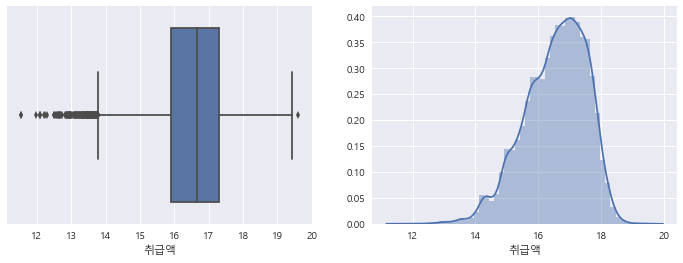

In [225]:
# log변환 후의 y  
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(y2, ax=ax1)
sns.distplot(y2, ax=ax2)

# Modeling 

In [156]:
import random

In [157]:
import warnings
warnings.filterwarnings(action='ignore')

In [158]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## LGBM

In [159]:
import lightgbm as lgb

In [269]:
# no hyperparameter tuning
lgb_params = {'learning_rate': 0.03, 'max_depth' : 16, 'objective': 'regression', 'metric': 'mape', 'is_training_metric': True,
              'min_child_samples' : 40, 'n_estimators' : 10000, 'num_leaves' : 8, 'subsample' : 0.6}

In [270]:
lgbm_mape = []
lgbm_idx = [] 
lgbm_feat_imp = [0] * len(X.columns)

lgbm_pred = [] # 최종 예측한 값 

for i in range(1,13):
    # 한달에서도 랜덤 샘플 반 뽑기
    test_idx = random.sample(list(X[X['방송월'] == i].index), int(len(X[X['방송월'] == i]) / 2))
    train_idx = set(X.index) - set(test_idx)
    
    train = X.loc[train_idx]
    test = X.loc[test_idx]
    y_test = y2.loc[test_idx]
    
    x_train = train[train['방송월'] != i]
    y_train = y2.loc[train[train['방송월'] != i].index]
    
    x_val = train[train['방송월'] == i]
    y_val = y2.loc[train[train['방송월'] == i].index]
    
    train_T = lgb.Dataset(x_train.values, label=y_train.values) 
    val_T = lgb.Dataset(x_val.values, label=y_val.values)
    
    
    model2 = lgb.train(lgb_params, train_T, 10000, valid_sets = val_T, verbose_eval=500, early_stopping_rounds=500)
    pred = model2.predict(test.values)

    
    lgbm_mape.append(mean_absolute_percentage_error(np.exp(y_test), np.exp(pred)))
    lgbm_feat_imp += model2.feature_importance()
    
    lgbm_pred.append(np.exp(pred))
    lgbm_idx.append(test_idx)
    
    print(lgbm_mape)
    
print(np.mean(lgbm_mape))

Training until validation scores don't improve for 500 rounds
[500]	valid_0's mape: 0.0262994
[1000]	valid_0's mape: 0.0248143
[1500]	valid_0's mape: 0.0244264
[2000]	valid_0's mape: 0.0242622
[2500]	valid_0's mape: 0.024234
[3000]	valid_0's mape: 0.0241831
[3500]	valid_0's mape: 0.0241294
[4000]	valid_0's mape: 0.0240447
[4500]	valid_0's mape: 0.0239923
[5000]	valid_0's mape: 0.0239492
[5500]	valid_0's mape: 0.0239206
[6000]	valid_0's mape: 0.0238906
[6500]	valid_0's mape: 0.0238492
[7000]	valid_0's mape: 0.0237961
[7500]	valid_0's mape: 0.0237523
[8000]	valid_0's mape: 0.0237239
[8500]	valid_0's mape: 0.023707
[9000]	valid_0's mape: 0.0236975
Early stopping, best iteration is:
[8924]	valid_0's mape: 0.0236857
[51.86228301645768]
Training until validation scores don't improve for 500 rounds
[500]	valid_0's mape: 0.0262012
[1000]	valid_0's mape: 0.0242966
[1500]	valid_0's mape: 0.0237736
[2000]	valid_0's mape: 0.0234148
[2500]	valid_0's mape: 0.0232567
[3000]	valid_0's mape: 0.0230881


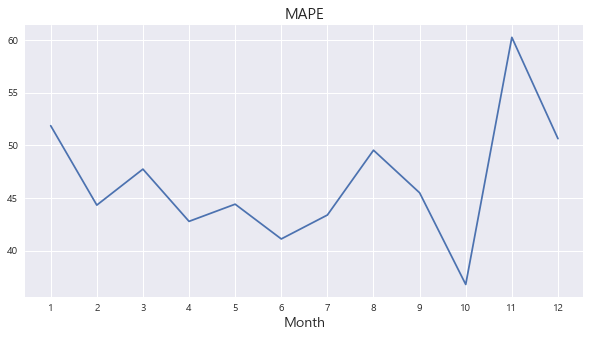

In [271]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.figure(figsize = (10, 5))
sns.lineplot(x = month, y=lgbm_mape, markers=True)
plt.xlabel('Month', fontsize = 14)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('MAPE', fontsize = 15)
plt.show()

* 46.523765290344336
* [51.86228301645768, 44.32065593783305, 47.73757566151433, 42.77658129264254, 44.40865504106695, 41.107415966104064, 43.37901745851762, 49.533715290701565, 45.49005584558923, 36.78616489109529, 60.251816526161896, 50.63124655644785]

In [272]:
feature_importance_lgbm = pd.DataFrame({'feature' : X2.columns, 
                                        'importance' : lgbm_feat_imp / 12}).sort_values(by='importance', ascending=False)

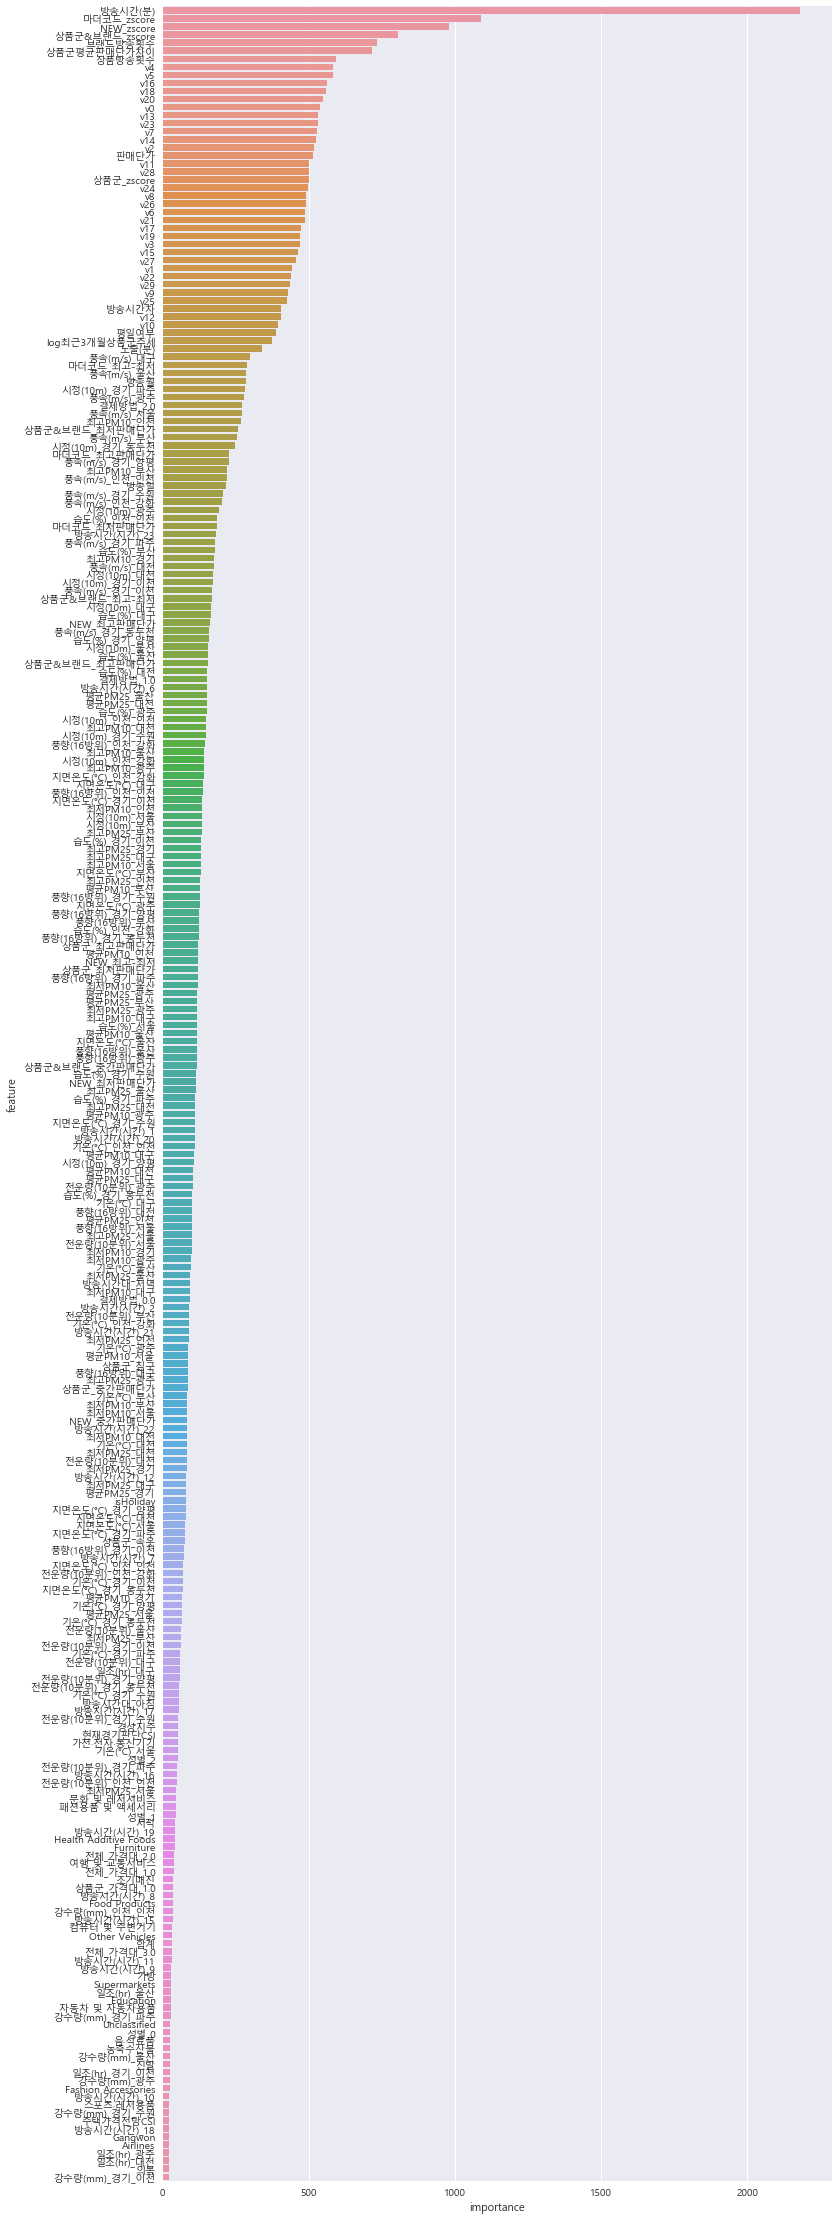

In [275]:
fig, ax = plt.subplots(figsize=(12,40))

sns.barplot(
    data= feature_importance_lgbm[feature_importance_lgbm["importance"] > 20],
    x= "importance",
    y= "feature"
)

In [277]:
feature_importance_lgbm.head(30)

,feature,importance
9,방송시간(분),2182.667
380,마더코드_zscore,1088.000
381,NEW_zscore,978.917
379,상품군&브랜드_zscore,805.750
4,브랜드방송횟수,733.583
26,상품군평균판매단가차이,716.833
3,상품방송횟수,592.833
33,v4,581.833
34,v5,581.417
45,v16,561.667


* 앙상블 하기 위해서는 동일한 값 기준으로 해야 하므로, 위에서 뽑은 test_idx 값을 활용해야 함 
* **idx**에 저장되어 있음 

In [278]:
total = 0 
for i in range(12) : 
    
    print(len(lgbm_pred[i]), len(lgbm_idx[i]))
    total += len(lgbm_pred[i])
    
print(total)

1382 1382
1337 1337
1536 1536
1566 1566
1640 1640
1430 1430
1566 1566
1451 1451
1491 1491
1487 1487
1353 1353
1449 1449
17688


In [250]:
y

0         2099000.000
1         4371000.000
2         3262000.000
3         6955000.000
4         6672000.000
             ...     
38299     2328000.000
38300    50929000.000
38301    13765000.000
38302   104392000.000
38303    46608000.000
Name: 취급액, Length: 35379, dtype: float64

## XGboost 

In [265]:
import xgboost as xgb

In [283]:
xgb_params = {
            'nthread': -1, 'booster' : 'gbtree', 'silent': 1, 
            'objective': 'reg:linear', 'eval_metric' : 'mae', 
            'num_boost_around' : 5000, 
            'lambda': 0.00001 , 
            'alpha': 0.4,
            'max_depth': 16,
            'eta': 0.3,
            'gamma': 0.000005,
            'grow_policy': 'depthwise',
            'subsample': 0.9,
            'colsample_bytree': 0.6,
            'colsample_bylevel': 0.6,
            'min_child_weight': 9,
            'max_bin': 70,        
            }

In [284]:
xgb_mape = []
xgb_idx = [] 
xgb_feat_imp = dict()
for col in X.columns : 
    xgb_feat_imp[col] = 0

xgb_pred = [] # 최종 예측한 값 

for i in range(1,13):
    # 한달에서도 랜덤 샘플 반 뽑기 : lgbm dataset과 동일한 test set 적용 
    train_idx = set(X.index) - set(lgbm_idx[i-1])
    
    train = X.loc[train_idx]
    test = X.loc[lgbm_idx[i-1]]
    y_test = y2.loc[lgbm_idx[i-1]]
    
    x_train = train[train['방송월'] != i]
    y_train = y2.loc[train[train['방송월'] != i].index]
    
    x_val = train[train['방송월'] == i]
    y_val = y2.loc[train[train['방송월'] == i].index]

    
    dtrain = xgb.DMatrix(x_train, label = y_train)
    dvalid = xgb.DMatrix(x_val, label = y_val)
        
    watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
    
    model3 = xgb.train(xgb_params, dtrain, 5000, watchlist, early_stopping_rounds=300, verbose_eval=300)
    
    dtest = xgb.DMatrix(test)
    pred = model3.predict(dtest)

    xgb_mape.append(mean_absolute_percentage_error(np.exp(y_test), np.exp(pred)))
    xgb_pred.append(pred)


    for key, value in model3.get_score(importance_type='gain').items() : 
        xgb_feat_imp[key] += value

    print(xgb_mape)
print(np.mean(xgb_mape))

[0]	train-mae:11.2326	valid-mae:11.2984
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 300 rounds.
[300]	train-mae:0.026111	valid-mae:0.42481
Stopping. Best iteration:
[62]	train-mae:0.069662	valid-mae:0.423614

[52.39470489784096]
[0]	train-mae:11.238	valid-mae:11.186
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 300 rounds.
[300]	train-mae:0.024855	valid-mae:0.390575
Stopping. Best iteration:
[25]	train-mae:0.131989	valid-mae:0.386152

[52.39470489784096, 47.134759171898025]
[0]	train-mae:11.2419	valid-mae:11.178
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 300 rounds.
[300]	train-mae:0.02484	valid-mae:0.454937
Stopping. Best iteration:
[22]	train-mae:0.147414	valid-mae:0.449846

[52.39470489784096, 47.134759171898025, 50.77854739

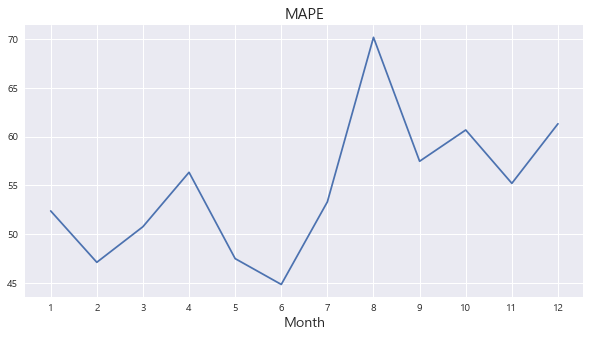

In [285]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.figure(figsize = (10, 5))
sns.lineplot(x = month, y=xgb_mape, markers=True)
plt.xlabel('Month', fontsize = 14)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('MAPE', fontsize = 15)
plt.show()

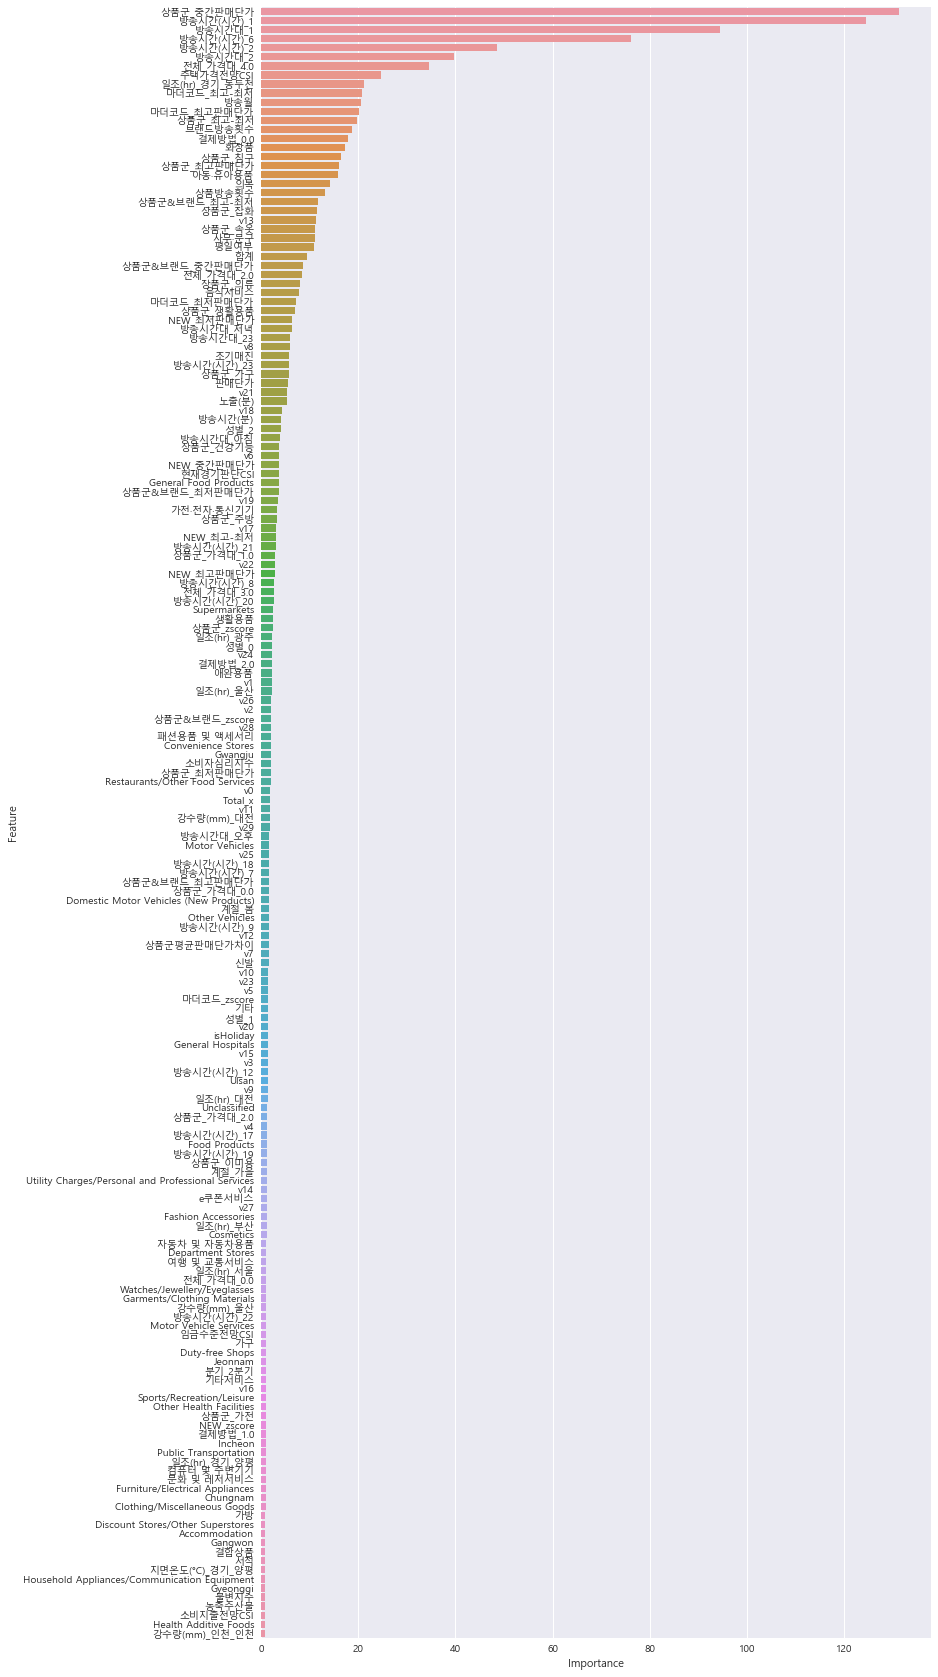

In [291]:
fig, ax = plt.subplots(figsize=(12,30))

sns.barplot(
    data = pd.DataFrame(xgb_feat_imp.items(), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False).head(180), 
    x= 'Importance',
    y= 'Feature'
)

In [287]:
pd.DataFrame(xgb_feat_imp.items(), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False).head(30)

,Feature,Importance
13,상품군_중간판매단가,131.378
330,방송시간(시간)_1,124.498
352,방송시간대_1,94.409
347,방송시간(시간)_6,76.070
341,방송시간(시간)_2,48.655
353,방송시간대_2,39.638
377,전체_가격대_4.0,34.520
65,주택가격전망CSI,24.601
203,일조(hr)_경기_동두천,21.066
17,마더코드_최고-최저,20.821


In [295]:
# lgbm test와 동일한 dataset 

total = 0 
for i in range(12) : 
    
    print(len(xgb_pred[i]), len(lgbm_idx[i]))
    total += len(xgb_pred[i])
    
print(total)

1382 1382
1337 1337
1536 1536
1566 1566
1640 1640
1430 1430
1566 1566
1451 1451
1491 1491
1487 1487
1353 1353
1449 1449
17688


## LGBM with Hyperparameter Tuning 
* 아직안했옹

In [ ]:
# no hyperparameter tuning
lgb_params = {'learning_rate': 0.03, 'max_depth' : 16, 'objective': 'regression', 'metric': 'mape', 'is_training_metric': True,
              'min_child_samples' : 40, 'n_estimators' : 10000, 'num_leaves' : 8, 'subsample' : 0.6}

In [ ]:
lgbm_mape_ver2 = []
lgbm_feat_imp_ver2 = [0] * len(X.columns)

lgbm_pred_ver2 = [] # 최종 예측한 값 

for i in range(1,13):
    # 한달에서도 랜덤 샘플 반 뽑기 : lgbm dataset과 동일한 test set 적용 
    train_idx = set(X.index) - set(lgbm_idx[i-1])
    
    train = X.loc[train_idx]
    test = X.loc[lgbm_idx[i-1]]
    y_test = y2.loc[lgbm_idx[i-1]]
    
    x_train = train[train['방송월'] != i]
    y_train = y2.loc[train[train['방송월'] != i].index]
    
    x_val = train[train['방송월'] == i]
    y_val = y2.loc[train[train['방송월'] == i].index]
    
    train_T = lgb.Dataset(x_train.values, label=y_train.values) 
    val_T = lgb.Dataset(x_val.values, label=y_val.values)
    
    
    model4 = lgb.train(lgb_params, train_T, 10000, valid_sets = val_T, verbose_eval=500, early_stopping_rounds=500)
    pred = model4.predict(test.values)

    
    lgbm_mape_ver2.append(mean_absolute_percentage_error(np.exp(y_test), np.exp(pred)))
    lgbm_feat_imp_ver2 += model4.feature_importance()
    
    lgbm_pred_ver2.append(np.exp(pred))

    print(lgbm_mape_ver2)
    
print(np.mean(lgbm_mape_ver2))

In [ ]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.figure(figsize = (10, 5))
sns.lineplot(x = month, y=lgbm_mape_ver2, markers=True)
plt.xlabel('Month', fontsize = 14)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('MAPE', fontsize = 15)
plt.show()

In [ ]:
feature_importance_lgbm_ver2 = pd.DataFrame({'feature' : X2.columns, 
                                             'importance' : lgbm_feat_imp_ver2 / 12}).sort_values(by='importance', ascending=False)

In [ ]:
fig, ax = plt.subplots(figsize=(12,40))

sns.barplot(
    data= feature_importance_lgbm_ver2[feature_importance_lgbm_ver2["importance"] > 20],
    x= "importance",
    y= "feature"
)

In [ ]:
feature_importance_lgbm_ver2.head(30)

In [ ]:
# lgbm test와 동일한 dataset 

total = 0 
for i in range(12) : 
    
    print(len(lgbm_pred_ver2[i]), len(lgbm_idx[i]))
    total += len(xgb_pred[i])
    
print(total)

## Ensemble 

In [298]:
print(len(lgbm_pred), len(xgb_pred))

12 12


In [ ]:
이걸 인덱스에 맞게 잘 짬뽕 해서 해야 함 

## Random Forest 

In [297]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_params = {
    'bootstrap' : True, 
    'max_features' : 'auto', 
    'n_estimators': 5000, 
    'criterion' : 'mae'
}